<a href="https://colab.research.google.com/github/TedFess/DSPS_tFessaras/blob/master/HW5/BuildingsEnergyOwners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
# -- link google drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# -- useful imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scipy as sp
from scipy import stats
import string

# data retrival
### LL84
get the Local Law 84 (ll84) data from the URL: https://data.cityofnewyork.us/api/views/8u86-bviy/rows.csv and read it in with Pandas

### Pluto
Download the pluto csv data and store it in your google drive. 

You can find the data here 
https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page

IMPORTANT: store it in the path *drive/My Drive/dsps/ with the name pluto_18v2_1.csv*

This path and name have to be exact. This way the grader and I will be able to run your notebook without changing anything as long as we also have stored the data in path drive/My Drive/dsps/pluto_18v2_1.csv. This is part of the _reproducibility_ requirement.

In [0]:
ll84 = pd.read_csv("https://data.cityofnewyork.us/api/views/8u86-bviy/rows.csv")

In [58]:
!wget https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_19v1_csv.zip


--2019-09-29 21:31:18--  https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_19v1_csv.zip
Resolving www1.nyc.gov (www1.nyc.gov)... 23.199.181.110, 2600:1402:3800:290::1500, 2600:1402:3800:29d::1500
Connecting to www1.nyc.gov (www1.nyc.gov)|23.199.181.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180783563 (172M) [application/zip]
Saving to: ‘nyc_pluto_19v1_csv.zip.1’

nyc_pluto_19v1_csv. 100%[===================>] 172.41M  75.0MB/s    in 2.3s    

2019-09-29 21:31:21 (75.0 MB/s) - ‘nyc_pluto_19v1_csv.zip.1’ saved [180783563/180783563]



In [59]:
!unzip "nyc_pluto_19v1_csv.zip"

Archive:  nyc_pluto_19v1_csv.zip
  inflating: pluto_19v1.csv          
replace PLUTODD19v1.pdf? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
!mv pluto_19v1.csv pluto_18v2_1.csv

# data fusion

### select data
select the data for buildings _in the borough of Manhattan_ only from the pluto file (you can do it broadcasting!)

### merge
merge the pluto and ll84 dataframes. you will have to choose an appropriate column that both datasets share fo do so. The column may not have the same nbame, but should have the same _variable_.

In [61]:
pluto = pd.read_csv("pluto_18v2_1.csv")

KeyboardInterrupt: ignored

In [0]:
pluto_mn = pluto[pluto["borough"] == "MN"]

In [101]:
pluto_mn.head()

,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healtharea,sanitboro,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,...,assessland,assesstot,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate,geom
0,MN,1103,36,104.0,135.0,1003.0,2.0,6.0,10019.0,E040,18.0,4500.0,1.0,3B,801 11 AVENUE,M2-3,NaN,NaN,NaN,NaN,NaN,CL,NaN,NaN,NaN,N,G8,5.0,0.0,NaN,"801 11TH AVE.,",26817.0,57805.0,57805.0,0.0,0.0,12000.0,30737.0,0.0,0.0,...,2313900.0,4700700.0,0.0,1920.0,2006.0,2011.0,NaN,NaN,2.16,0.0,2.0,0.0,1,1011030036,NaN,135.0,986332.0,219627.0,8c,NaN,106W002,10405.0,NaN,NaN,NaN,1,19v1,4.0,15.0,NaN,NaN,07/06/2019,11/15/2018,07/29/2019,07/05/2019,07/26/2019,NaN,NaN,05/31/2019,0106000020E61000000100000001030000000100000007...
1,MN,1109,100,104.0,135.0,1000.0,2.0,3.0,10019.0,E040,18.0,4500.0,1.0,3B,PIER,M2-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,T9,7.0,0.0,X,NYS DEPT OF ENVIR CONSV,172842.0,105562.0,105562.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16200000.0,34528500.0,34528500.0,2002.0,0.0,0.0,NaN,NaN,0.61,0.0,2.0,0.0,1,1011090100,NaN,135.0,985279.0,219475.0,8c,NaN,106W073,10405.0,NaN,1.011100e+09,05/23/2011,1,19v1,4.0,15.0,1.0,1.0,07/06/2019,11/15/2018,07/29/2019,07/05/2019,07/26/2019,NaN,NaN,05/31/2019,0106000020E6100000010000000103000000010000000A...
2,MN,1121,29,107.0,153.0,6000.0,3.0,6.0,10023.0,L035,20.0,4000.0,1.0,1A,80 CENTRAL PARK WEST,R10A,R8B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,D4,3.0,0.0,NaN,80 CPW APT CORP,15002.0,225552.0,31500.0,194052.0,7000.0,0.0,24500.0,0.0,0.0,...,6001650.0,26984250.0,399257.0,1968.0,0.0,0.0,Upper West Side / Central Park West Historic D...,NaN,15.03,10.0,0.0,10.0,1,1011210029,NaN,153.0,990305.0,221271.0,8c,NaN,106W026,10406.0,NaN,NaN,NaN,1,19v1,7.0,15.0,NaN,NaN,07/06/2019,11/15/2018,07/29/2019,07/05/2019,07/26/2019,NaN,NaN,05/31/2019,0106000020E61000000100000001030000000100000009...
3,MN,1099,12,104.0,135.0,2005.0,2.0,3.0,10019.0,E040,18.0,4500.0,1.0,3B,631 WEST 51 STREET,M2-4,NaN,NaN,NaN,NaN,NaN,CL,NaN,NaN,NaN,N,E7,6.0,0.0,NaN,630 WEST 52ND LLC,9050.0,36184.0,36184.0,0.0,0.0,0.0,0.0,36184.0,0.0,...,794250.0,3680550.0,0.0,1946.0,0.0,2016.0,NaN,NaN,4.00,0.0,5.0,0.0,1,1010990012,NaN,135.0,985450.0,218920.0,8c,NaN,105N050,10405.0,NaN,NaN,NaN,1,19v1,4.0,15.0,NaN,NaN,07/06/2019,11/15/2018,07/29/2019,07/05/2019,07/26/2019,NaN,NaN,05/31/2019,0106000020E61000000100000001030000000100000009...
5,MN,1096,34,104.0,129.0,1004.0,2.0,3.0,10019.0,E054,18.0,4500.0,1.0,3B,677 11 AVENUE,M2-4,NaN,NaN,NaN,NaN,NaN,CL,NaN,NaN,NaN,N,V1,11.0,0.0,NaN,"677 ELEVENTH AVENUE REALTY, LLC",10057.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,895050.0,895050.0,0.0,0.0,0.0,0.0,NaN,NaN,0.00,0.0,5.0,0.0,1,1010960034,NaN,129.0,985476.0,218073.0,8c,NaN,105N049,10405.0,NaN,1.010960e+09,09/16/2009,1,19v1,4.0,15.0,NaN,NaN,07/06/2019,11/15/2018,07/29/2019,07/05/2019,07/26/2019,NaN,NaN,05/31/2019,0106000020E6100000010000000103000000010000000A...


In [102]:
ll84.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1.013160e+09,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675.0,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447.0,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0.0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1.021380e+09,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180.0,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181.0,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924.0,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1.021380e+09,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975.0,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342.0,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,0.0,0.0,0.0,231342,Not Available,Not Available,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1.021390e+09,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161.0,FT WASHINGTON AVENUE,Manhattan,891040.0,H

In [0]:
merged = pd.merge(pluto_mn, ll84, left_on = "bbl", right_on = "BBL - 10 digits")

In [104]:
merged.head()

,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healtharea,sanitboro,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,...,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,MN,1121,29,107.0,153.0,6000.0,3.0,6.0,10023.0,L035,20.0,4000.0,1.0,1A,80 CENTRAL PARK WEST,R10A,R8B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,D4,3.0,0.0,NaN,80 CPW APT CORP,15002.0,225552.0,31500.0,194052.0,7000.0,0.0,24500.0,0.0,0.0,...,Not Available,Not Available,Not Available,1968,1,100,Whole Building,Whole Building,11,121.3,120.1,8.1,0.9,184,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,1.48260263E7,146683.1,4435636.6,1290307.5,1199.1,787.5,411.6,158828,5981.4,37.66,185.7,05/01/2017 02:58:14 PM,Yes,In Compliance,40.773754,-73.977767,7.0,6.0,153.0,Lincoln Square ...
1,MN,1127,29,107.0,161.0,4000.0,3.0,6.0,10023.0,L025,20.0,3500.0,1.0,2Q,145 CENTRAL PARK WEST,R10A,R8B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,D4,3.0,0.0,NaN,SAN REMO TENANTS CORP,34532.0,490265.0,10000.0,480265.0,10000.0,0.0,0.0,0.0,0.0,...,Not Available,Not Available,Not Available,1930,1,100,Whole Building,Not Available,89,46.5,Not Available,Not Available,0.2,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,1.24171322E7,124171.3,11197665.8,Not Available,1698.7,659.5,1039.1,507774,10395.8,20.47,94.9,05/01/2017 10:35:35 PM,Yes,In Compliance,40.777854,-73.974772,7.0,6.0,161.0,Upper West Side ...
2,MN,1129,50,107.0,161.0,2000.0,3.0,6.0,10024.0,L025,20.0,3500.0,1.0,2A,40 WEST 77 STREET,R10A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,D4,3.0,0.0,NaN,4077 OWNERS CORP,14493.0,162676.0,3000.0,159676.0,3000.0,0.0,0.0,0.0,0.0,...,Not Available,Not Available,Not Available,1928,1,100,Whole Building,Whole Building,100,64.6,69.6,4,0.6,101.6,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,8208163.6,91110.7,2306487.2,649924.5,650.0,436.0,214.0,162676,4933.5,30.33,97.5,04/21/2017 04:16:54 PM,Yes,In Compliance,40.780141,-73.975201,7.0,6.0,161.0,Upper West Side ...
3,MN,1166,135,107.0,163.0,5003.0,3.0,6.0,10023.0,L025,20.0,3400.0,1.0,2B,200 WEST 75 STREET,C4-6A,NaN,NaN,NaN,NaN,NaN,EC-3,NaN,NaN,NaN,N,J5,5.0,0.0,NaN,UNAVAILABLE OWNER,19242.0,99663.0,99663.0,0.0,5588.0,0.0,0.0,0.0,0.0,...,Not Available,Not Available,Not Available,1929,1,100,Whole Building,Not Available,Not Available,52.4,57.3,3,Not Available,79.6,Not Available,2412271.5,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,596332.9,171749.4,234.4,179.0,55.3,57422,Not Available,Not Available,75.0,05/01/2017 02:58:14 PM,Yes,In Compliance,40.780617,-73.980364,7.0,6.0,163.0,Upper West Side ...
4

# data exploration and cleaning

### extact columns
extract the columns listed in the file "columns.txt" from the dataset.

convert the resulting dataset to numerical, converting non-numerical values to NaN. drop rows that contain invalid values and save the resulting dataframe (_reducted_ dataframe)

In [0]:
file = open("columns.txt", 'r')
extracted = pd.DataFrame()
for line in file:
  column = line.rstrip()
  extracted[column] = merged[column]
file.close()

In [0]:
saved_extracted = extracted

In [137]:
saved_extracted.head()

,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Electricity Use - Grid Purchase (kBtu),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),bldgarea,numbldgs,numfloors,unitsres,unitstotal,yearalter1
0,225552.0,1968,1,100,11,121.3,120.1,8.1,0.9,184,4435636.6,1199.1,158828,5981.4,37.66,185.7,225552.0,1.0,24.0,165.0,168.0,0.0
1,490265.0,1930,1,100,89,46.5,Not Available,Not Available,0.2,Not Available,11197665.8,1698.7,507774,10395.8,20.47,94.9,490265.0,1.0,28.0,138.0,146.0,2017.0
2,162676.0,1928,1,100,100,64.6,69.6,4,0.6,101.6,2306487.2,650.0,162676,4933.5,30.33,97.5,162676.0,1.0,16.0,100.0,102.0,1988.0
3,99663.0,1929,1,100,Not Available,52.4,57.3,3,Not Available,79.6,596332.9,234.4,57422,Not Available,Not Available,75.0,99663.0,1.0,12.0,0.0,1.0,2005.0
4,77008.0,1924,1,100,76,66.1,65.7,3.4,0.5,93,976693.5,325.9,81821,3489.8,42.65,94.3,77008.0,1.0,15.0,33.0,34.0,1988.0


In [138]:
file = open("columns.txt", 'r')
for line in file:
  extracted = extracted[extracted[line.rstrip()]!= "Not Available"]

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [140]:
extracted

,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Electricity Use - Grid Purchase (kBtu),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),bldgarea,numbldgs,numfloors,unitsres,unitstotal,yearalter1
0,225552.0,1968,1,100,11,121.3,120.1,8.1,0.9,184,4435636.6,1199.1,158828,5981.4,37.66,185.7,225552.0,1.0,24.0,165.0,168.0,0.0
2,162676.0,1928,1,100,100,64.6,69.6,4,0.6,101.6,2306487.2,650.0,162676,4933.5,30.33,97.5,162676.0,1.0,16.0,100.0,102.0,1988.0
4,77008.0,1924,1,100,76,66.1,65.7,3.4,0.5,93,976693.5,325.9,81821,3489.8,42.65,94.3,77008.0,1.0,15.0,33.0,34.0,1988.0
5,50600.0,1903,1,100,81,97.6,104.4,3.4,0.3,131.3,601350.9,358.9,51600,1400.4,27.14,124.5,50600.0,1.0,11.0,61.0,61.0,2016.0
6,170801.0,1925,1,100,36,90.1,96.9,8.7,0,161,5191270.1,1259.3,172465,7038.4,40.81,155.1,170801.0,1.0,15.0,77.0,84.0,1985.0
7,524466.0,2001,1,100,15,98.6,103.2,7.1,0.8,159,13462125.1,3300.7,528466,18438,34.89,156.7,524466.0,1.0,33.0,455.0,459.0,0.0
8,367786.0,2003,1,100,22,94.7,100,7.8,0.7,160.5,10244199.5,2267.8,370082,14131.5,38.18,157.3,367786.0,1.0,26.0,354.0,357.0,0.0
10,186100.0,1928,1,100,100,25.1,26.4,3.6,0,52.6,2627623.8,438.5,209664,5986.7,28.55,52.1,186100.0,1.0,17.0,143.0,144.0,1988.0
11,185041.0,1963,1,100,97,39.0,38.5,3.8,0.3,67.2,2465192.9,482.3,185471,6781.8,36.57,68.8,185041.0,1.0,21.0,151.0,152.0,1989.0
12,64776.0,1914,1,100,100,18.6,18.1,5,0,54.3,1216340.4,117.0,69707,1538.7,22.07,56.0,64776.0,1.0,12.0,72.0,72.0,1986.0


### Assess impact of data wrangling
Describe the  datasets resulting from this data cleaning: 

- how many observations have you lost? 

- did any of the features (=columns) have inconsistent distribution between the full and reducted dataset? 

You can approach this question in a number of ways, and you have done this in the  homewors already (with a KS test, and by just looking at uncertainties are two examples of ways to do ut that you worked out in HW3 and HW4, the Z test might work if you can convince yourself that the full sample is the "population" - up to you! a quick google search would probably describe many more ways). Choose _2_ ways, describe what each does and why it is appropriate. Compare the results (indeed I did it in 4 ways and did not always get consistent results! each of these meathods measures a slightly different thing).



In [0]:
ll84pl[goodcols].describe()

,Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Electricity Use - Grid Purchase (kBtu),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),bldgarea,numbldgs,numfloors,unitsres,unitstotal,yearalter1
count,5176.000000,5176.000000,5176.000000,4057.000000,5122.000000,4619.000000,4899.000000,4070.000000,4619.000000,5.101000e+03,5.160000e+03,5.176000e+03,3.388000e+03,3388.000000,5122.000000,4.290000e+04,42844.000000,42844.000000,42898.000000,42898.000000,42898.000000
mean,1943.956723,1.056221,98.469861,58.689426,252.626045,266.941373,10.414227,0.411818,381.910067,8.584119e+06,4.704265e+03,2.088364e+05,1.481517e+04,94.268548,364.565502,4.301289e+04,1.113762,5.872763,22.280876,25.351858,1055.207096
std,33.123462,0.773553,8.486776,30.809480,3124.750511,3277.960226,58.764605,2.624555,3987.815401,2.498918e+07,8.912783e+04,3.109891e+05,1.483005e+05,1126.541657,3802.615408,1.664784e+05,1.383727,6.189731,92.373077,95.386177,993.277780
min,1600.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1920.000000,1.000000,100.000000,33.000000,61.900000,64.800000,4.800000,0.000000,110.750000,1.540483e+06,4.000250e+02,7.230700e+04,2.375100e+03,22.580000,106.800000,4.390000e+03,1.000000,3.000000,1.000000,2.000000,0.000000
50%,1930.000000,1.000000,100.000000,66.000000,77.200000,80.800000,7.300000,0.300000,143.100000,3.180848e+06,6.545500e+02,1.150115e+05,4.327050e+03,35.925000,139.300000,8.875000e+03,1.000000,5.000000,6.000000,8.000000,1968.000000
75%,1967.000000,1.000000,100.000000,85.000000,98.400000,102.000000,12.400000,0.600000,188.100000,7.265680e+06,1.292225e+03,2.136252e+05,8.308225e+03,53.855000,184.975000,2.321050e+04,1.000000,6.000000,18.000000,20.000000,1988.000000
max,2016.000000,35.000000,100.000000,100.000000,126307.400000,126307.400000,4074.900000,131.000000,152001.300000,1.037256e+09,4.764456e+06,8.942176e+06,6.376003e+06,57699.300000,152001.300000,1.343508e+07,159.000000,104.000000,8764.000000,8812.000000,2018.000000


In [141]:
print(extracted.shape)
print(saved_extracted.shape)

(2045, 22)
(5186, 22)


In [147]:
print("lost buildings: ... (", 2045 / 5186 * 100 ,"%) ")

lost buildings: ... ( 39.43308908600077 %) 


### plot WNEC
Regardless of what you found above, plot the distribution of the _log base 10_ of the weather-normalized site energy consumption (WNEC) for all values larger than 0.1 (such that log10(min) is -1) for the _entire dataset_ and for the _reducted one_: do you think inference on this feature would be affected by this way of dealing with missing data affects the result?



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


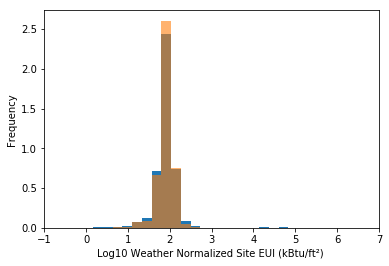

# 667 and extyra credit
plot a "scatter matrix" of the selected columns. Identify 4 promising "scaling laws" and plot them separately (a scatter plot of column1 vs column2). Does it make sense that there should be a scaling law between the 2 variables? 

which features should be strongly correlated or identical but are not? discuss

([this](https://stackoverflow.com/questions/26975089/making-the-labels-of-the-scatterplot-vertical-and-horizontal-in-pandas) stackoverflow may come in handy)

## all students
At last, from the original dataset remove only the columns that are NaN in the column "Weather Normalized Site EUI (kBtu/ft²)"


In [0]:
# -- drop buildings for which WN Site EUI is NaN
wnec = "Weather Normalized Site EUI (kBtu/ft²)"
...
ll84pl.shape

(4619, 156)

## Analysis: Owner investigation 
### Find owner of the single most energy consuming building

**Find owner of the single most energy consuming building**, as measured by the "Site Weather Normalized EUI per unit area ". 

**Find all the buildings that they own.**


show the weather-normalized site energy consumption and the owner name for the top 30 consuming buildings in Manhattan

In [0]:
print("Owner of the hisghest consuming building:...", 
      "They own ... buildings")

Owner of the hisghest consuming building:... They own ... buildings


### Find average building consumption by owner 
For all owners that own more than one building, find the average consumption for buildings owned by the same owner. Your dataframe should have 2 columns called _Weather Normalized Site EUI (kBtu/ft²)_	and _counts_

**Who owns the most energy consuming buildings on average?**

**Who owns the most buildings**

# 667 and EC

Universities are big realtors in NYC. The may own by different names. Find all builgings owned by NYU and COLUMBIA. replace the ownename with NYU and COLUMBIA respectively and re-aggregate the data based on these names and again find the owner of the buildings that pon average consume the most, of the highest number of buildings, and that owns the most sq footage 